# Análisis de segmentación de clientes con ayuda de RFM

Autor: Gerardo Andrés Arias Remolina

A continuación abordaré una base de datos anonimizada de clientes de una tienda comercial del segmento de chocolates. Esta base de datos incluye datos asociados a los dias en que los cliente realizaron las compras, el tipo de chocolates que compraron y sus respectivos precios, además incluye una serie de datos demográficos que usaré para realizar esta segmentación de clientes a través de un análisis de RFM (Recencia, Frecuencia y Valor Monetario). Existen métodos propios de Machine Learning más eficientes en tales segmentaciones, pero es importante no dejar de lado métodos tradicionales que han mostrado buenos resutados en el pasado.

A grandes rasgos RFM trata de clasificar cada uno de los clientes por su desempeño en cada una de las métricas RFM. Un cliente ideal sería entonces uno que tuviera la menor recencia (cantidad de días antes de la última compra), mayor frecuencia (cantidad de veces que compró en un tiempo determinado) y mayor valor monetario (monto total comprado). La segmetación que realizaré a continuación le dará una calificación a cada cliente según su desempeño y con ello hará una segmentación por clientes, de forma tal que se pueda identificar a los mejores clientes, a los clientes inactivos y a todos aquellos en medio de estos.

Finalmente realizaré algunas tablas de frecuencia y pruebas chi cuadrado para analizar la relación de las variables demográficas categóricas contrastadas con los segmentos de clientes.

## Contenido

1. Exploración visual de las variables demográficas (sexo, estado civil, edad, educación, ingreso, ocupación y tamaño de la ciudad)
2. Análisis calculando recencia, frecuencia y valor monetario
3. Descubriendo insights relacionando datos demográficos con los segmentos de clientes

In [1]:
 !pip install dataframe_image

     |████████████████████████████████| 1.1 MB 6.2 MB/s 
     |████████████████████████████████| 271 kB 59.1 MB/s 
     |████████████████████████████████| 192 kB 36.8 MB/s 
     |████████████████████████████████| 160 kB 62.8 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
df =  pd.read_excel("/content/drive/MyDrive/BD_GoogleColab/BASE_MiBanco.xlsx", 
                      usecols="A:W"          # Definimos las columnas que deseamos tomar
                     )

In [4]:
df.head()

,ID,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD
0,200000001,1,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [5]:
df.set_index('ID', inplace=True)

In [6]:
df.tail()

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD
ID,,,,,,,,,,,,,,,,,,,,,,
200000500,703,0,0,0,2,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0
200000500,710,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0
200000500,717,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0
200000500,722,1,2,3,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0
200000500,726,0,0,0,2,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0


In [7]:
df.shape

(58693, 22)

In [8]:
df.dtypes

DIA                     int64
INCIDENCIA              int64
MARCA                   int64
CANTIDAD                int64
ULTIMA_VENTA_MARCA      int64
PRECIO_1              float64
PRECIO_2              float64
PRECIO_3              float64
PRECIO_4              float64
PRECIO_5              float64
PROMOCION_1             int64
PROMOCION_2             int64
PROMOCION_3             int64
PROMOCION_4             int64
PROMOCION_5             int64
SEXO                    int64
ESTADO_CIVIL            int64
EDAD                    int64
EDUCACION               int64
INGRESO                 int64
OCUPACION               int64
TAMAÑO_CIUDAD           int64
dtype: object

## 1. Exploración visual de las variables demográficas (sexo, estado civil, edad, educación, ingreso, ocupación y tamaño de la ciudad)

Sexo

In [9]:
df_sinDuplicados =  pd.read_excel("/content/drive/MyDrive/BD_GoogleColab/BASE_MiBanco.xlsx", 
                      usecols="A:W"          # Definimos las columnas que deseamos tomar
                     )

In [10]:
df_sinDuplicados = df_sinDuplicados.drop_duplicates(subset='ID')

In [11]:
df_sinDuplicados.set_index('ID', inplace=True)

In [12]:
df_sinDuplicados.index.nunique(), df_sinDuplicados.shape

(500, (500, 22))

In [13]:
data_sexo = np.unique(df_sinDuplicados.SEXO, return_counts=True)
labs_sexo = ['Masculino','Femenino']
data_sexo

(array([0, 1]), array([306, 194]))

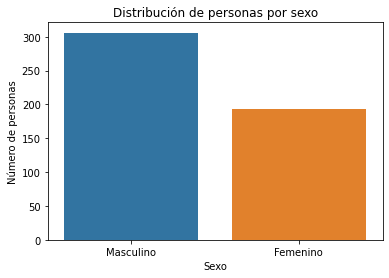

In [14]:
plt_sexo = sns.barplot(x=labs_sexo, y=data_sexo[1])
plt_sexo.set(xlabel = 'Sexo',ylabel= 'Número de personas', title='Distribución de personas por sexo')
plt_sexo.figure.savefig('DistribucionPorSexo.png')

Estado Civil

In [15]:
data_estadoCivil = np.unique(df_sinDuplicados.ESTADO_CIVIL, return_counts=True)
labs_estadoCivil = ['Soltero','No soltero']
data_estadoCivil

(array([0, 1]), array([304, 196]))

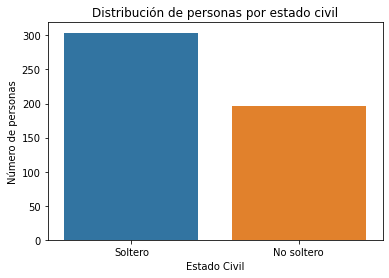

In [16]:
plt_estadoCivil = sns.barplot(x=labs_estadoCivil, y=data_estadoCivil[1])
plt_estadoCivil.set(xlabel = 'Estado Civil',ylabel= 'Número de personas', title='Distribución de personas por estado civil')
plt_estadoCivil.figure.savefig('DistribucionPorEstadoCivil.png')

Educación

In [17]:
data_educacion = np.unique(df_sinDuplicados.EDUCACION, return_counts=True)
labs_educacion = ['Otro/desc','Escuela Secundaria','Universidad','Escuela Posgrados']
data_educacion

(array([0, 1, 2, 3]), array([ 75, 314,  99,  12]))

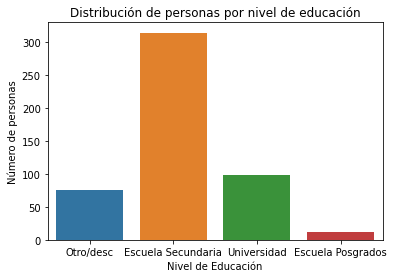

In [18]:
plt_educacion = sns.barplot(x=labs_educacion, y=data_educacion[1])
plt_educacion.set(xlabel = 'Nivel de Educación',ylabel= 'Número de personas',title='Distribución de personas por nivel de educación')
plt_educacion.figure.savefig('DistribucionPorNivelEducacion.png')

Ocupación

In [19]:
data_ocupacion = np.unique(df_sinDuplicados.OCUPACION, return_counts=True)
labs_ocupacion = ['Desempleados/No Calificados','Empleado/Funcionario Calificado','Altamente Calificado/Funcionarios']
data_ocupacion

(array([0, 1, 2]), array([184, 248,  68]))

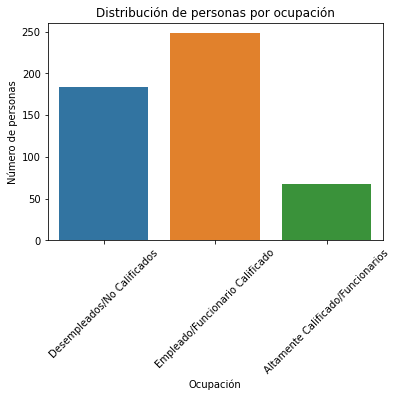

In [20]:
plt_ocupacion = sns.barplot(x=labs_ocupacion, y=data_ocupacion[1])
plt_ocupacion.set(xlabel = 'Ocupación',ylabel= 'Número de personas',title='Distribución de personas por ocupación')
plt_ocupacion.set_xticklabels(plt_ocupacion.get_xticklabels(),rotation = 45)
plt_ocupacion.figure.savefig('DistribucionPorOcupacion.png')

Tamaño de la Ciudad

In [21]:
data_tamanoCiudad = np.unique(df_sinDuplicados.TAMAÑO_CIUDAD, return_counts=True)
labs_tamanoCiudad = ['Pequeña Ciudad','Ciudad Mediana','Gran Ciudad']
data_tamanoCiudad

(array([0, 1, 2]), array([280, 121,  99]))

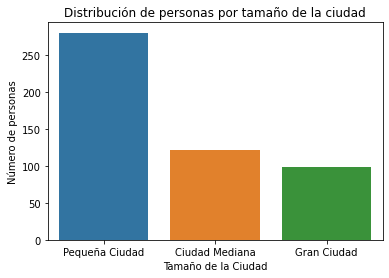

In [22]:
plt_tamanoCiudad = sns.barplot(x=labs_tamanoCiudad, y=data_tamanoCiudad[1])
plt_tamanoCiudad.set(xlabel = 'Tamaño de la Ciudad',ylabel= 'Número de personas',title='Distribución de personas por tamaño de la ciudad')
plt_tamanoCiudad.figure.savefig('DistribucionPorTamanoCiudad.png')

Edades

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


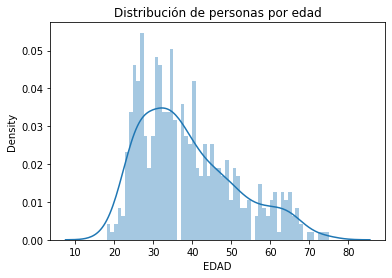

In [23]:
plt_distribucionEdades = sns.distplot(df_sinDuplicados['EDAD'], kde=True, bins=60)
plt_distribucionEdades.set(title='Distribución de personas por edad')
plt_distribucionEdades.figure.savefig('DistribucionPorEdades_Histograma.png')

Ingreso

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


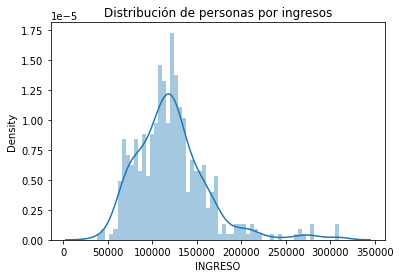

In [24]:
plt_distribucionIngresos = sns.distplot(df_sinDuplicados['INGRESO'], kde=True, bins=60)
plt_distribucionIngresos.set(title='Distribución de personas por ingresos')
plt_distribucionIngresos.figure.savefig('DistribucionPorIngresos_Histograma.png')

In [25]:
df_sinDuplicados.describe()

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD
count,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.0,500.000000,500.0,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.250000,0.106000,0.388000,0.258000,0.0,1.579120,1.873060,2.002960,2.090000e+00,2.660000e+00,0.0,0.594000,0.0,0.0,0.0,0.388000,0.392000,38.676000,1.096000,121520.162000,0.768000,0.638000
std,2.835415,0.308146,1.191762,0.886006,0.0,0.027451,0.006967,0.014929,8.890679e-15,1.066882e-14,0.0,0.491576,0.0,0.0,0.0,0.487783,0.488686,12.191977,0.660042,41061.953449,0.671624,0.792599
min,1.000000,0.000000,0.000000,0.000000,0.0,1.510000,1.870000,1.950000,2.090000e+00,2.660000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,29.000000,1.000000,95040.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,36.000000,1.000000,117804.500000,1.000000,0.000000
75%,6.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,46.000000,1.000000,137190.750000,1.000000,1.000000
max,12.000000,1.000000,5.000000,6.000000,0.0,1.590000,1.890000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


## 2. Análisis calculando recencia, frecuencia y valor monetario

In [26]:
listaDeCondiciones = [
                      (df['MARCA']==1),
                      (df['MARCA']==2),
                      (df['MARCA']==3),
                      (df['MARCA']==4),
                      (df['MARCA']==5)]
listaDeEleccion = [(df['CANTIDAD'] * df['PRECIO_1']),(df['CANTIDAD'] * df['PRECIO_2']),(df['CANTIDAD'] * df['PRECIO_3']),(df['CANTIDAD'] * df['PRECIO_4']),(df['CANTIDAD'] * df['PRECIO_5'])]
df['totalPagado'] = np.select(listaDeCondiciones, listaDeEleccion,default=0)

In [27]:
df.head(25)

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD,totalPagado
ID,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,11,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,12,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,16,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,18,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,23,0,0,0,0,1.50,1.90,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,28,1,2,2,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,3.80
200000001,37,0,0,0,2,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,0.00
200000001,41,0,0,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,0,0,47,1,110866,1,0,0.00


In [28]:
datosAgrupadosRFM = df.groupby('ID').agg({'DIA': lambda fecha: (731 - fecha.max()),
                                          'INCIDENCIA': lambda numero: numero.sum(),
                                          'totalPagado': lambda precio: precio.sum()})

In [29]:
datosAgrupadosRFM.rename(columns={'DIA': 'Recencia',
                                  'INCIDENCIA': 'Frecuencia',
                                  'totalPagado': 'Valor_Monetario'}, inplace=True)

In [30]:
datosAgrupadosRFM

,Recencia,Frecuencia,Valor_Monetario
ID,,,
200000001,4,9,33.96
200000002,2,11,41.74
200000003,7,10,32.27
200000004,6,11,32.96
200000005,2,13,54.97
...,...,...,...
200000496,8,20,90.53
200000497,9,43,460.31
200000498,2,39,219.65


Veamos cómo se distribuyen las variables anteriormente creadas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


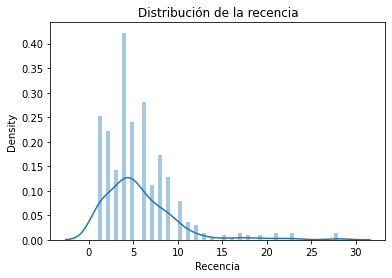

In [31]:
plt_distribucionRecencia = sns.distplot(datosAgrupadosRFM['Recencia'], kde=True, bins=60)
plt_distribucionRecencia.set(title='Distribución de la recencia')
plt_distribucionRecencia.figure.savefig('DistribucionRecencia_Histograma.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


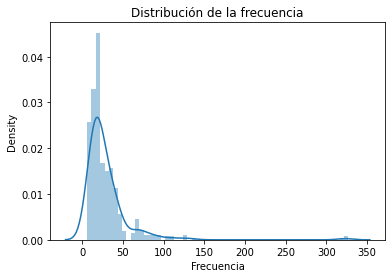

In [32]:
plt_distribucionFrecuencia = sns.distplot(datosAgrupadosRFM['Frecuencia'], kde=True, bins=60)
plt_distribucionFrecuencia.set(title='Distribución de la frecuencia')
plt_distribucionFrecuencia.figure.savefig('DistribucionFrecuencia_Histograma.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


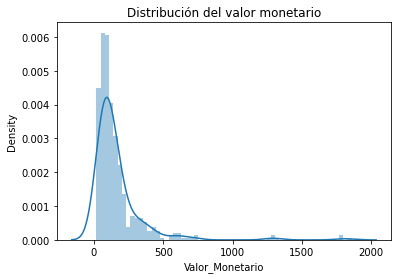

In [33]:
plt_valorMonetario = sns.distplot(datosAgrupadosRFM['Valor_Monetario'], kde=True, bins=60)
plt_valorMonetario.set(title='Distribución del valor monetario')
plt_valorMonetario.figure.savefig('DistribucionValorMonetario_Histograma.png')

### Definición de los clientes de acuerdo a su RFM 

En este punto resulta clave entender que para una compañía es importante obtener clientes que dentro de sus características hagan compras con menor recencia, mayor frecuencia y mayor valor manetario.

En ese sentido a continuación elaboré un ranking que ordena a los clientes de acuerdo a los criterios anteriormente mencionados. La segmentación de los clientes se hace por cuartiles, siendo el cuartil uno el que presenta los valores más bajos y el cuartil cuatro los más altos. 

*CRITERIOS*

Quienes obtengan 1 tendrán la calificación óptima y quiene obtengan 4 la calificación más baja. En el código se invirte las etiquetas para que frecuencia y valor monetaria tengan el último cuartil con la calificación más alta que es 1.

*EJEMPLO*

Un cliente con calificación 111, será aquel que se ubiqué en el grupo de clientes con la menor recencia, la mayor frecuencia y el mayor valor monetario.

In [34]:
datosAgrupadosRFM['cuartil_Recencia'] = pd.qcut(datosAgrupadosRFM['Recencia'], 4, ['1','2','3','4'])
datosAgrupadosRFM['cuartil_Frecuencia'] = pd.qcut(datosAgrupadosRFM['Frecuencia'], 4, ['4','3','2','1'])
datosAgrupadosRFM['cuartil_valorMonetario'] = pd.qcut(datosAgrupadosRFM['Valor_Monetario'], 4, ['4','3','2','1'])

In [35]:
datosAgrupadosRFM

,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario
ID,,,,,,
200000001,4,9,33.96,2,4,4
200000002,2,11,41.74,1,4,4
200000003,7,10,32.27,3,4,4
200000004,6,11,32.96,3,4,4
200000005,2,13,54.97,1,4,4
...,...,...,...,...,...,...
200000496,8,20,90.53,4,3,3
200000497,9,43,460.31,4,1,1
200000498,2,39,219.65,1,1,1


In [36]:
datosAgrupadosRFM['Puntaje_RFM'] = datosAgrupadosRFM.cuartil_Recencia.astype(str)+ datosAgrupadosRFM.cuartil_Frecuencia.astype(str) + datosAgrupadosRFM.cuartil_valorMonetario.astype(str)
datosAgrupadosRFM.head()

,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,Puntaje_RFM
ID,,,,,,,
200000001,4,9,33.96,2,4,4,244
200000002,2,11,41.74,1,4,4,144
200000003,7,10,32.27,3,4,4,344
200000004,6,11,32.96,3,4,4,344
200000005,2,13,54.97,1,4,4,144


In [37]:
datosAgrupadosRFM[datosAgrupadosRFM['Puntaje_RFM']=='111'].sort_values('Valor_Monetario', ascending=False).head()

,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,Puntaje_RFM
ID,,,,,,,
200000326,1,112,752.24,1,1,1,111
200000422,1,111,724.65,1,1,1,111
200000120,1,106,707.16,1,1,1,111
200000374,1,106,688.44,1,1,1,111
200000475,3,71,636.35,1,1,1,111


Los clientes con menor recencia, mayor frecuencia y mayor valor monetario corresponden a aquellos que deben ser priorizados toda vez que son aquellos que tienden a comprar en mayores montos, tienden a ser recurrentes en sus compras y además, son compradores asiduos día tras día.

In [38]:
datosAgrupadosRFM[datosAgrupadosRFM['Puntaje_RFM']=='111'].count()

Recencia                  24
Frecuencia                24
Valor_Monetario           24
cuartil_Recencia          24
cuartil_Frecuencia        24
cuartil_valorMonetario    24
Puntaje_RFM               24
dtype: int64

Identificamos el número de segmentos que de acuerdo con RFM existen en el dataset. 

In [39]:
datosAgrupadosRFM_unicos = datosAgrupadosRFM.groupby('Puntaje_RFM')['Puntaje_RFM'].nunique()
print(datosAgrupadosRFM_unicos.sum())

45


Sin embargo, el número de segmentos hace que el análisis de cada uno se atomice demasiado y que los resultados no sean lo suficientemente generalizables. Por lo tanto a continuación se sumarán los puntajes obtenidos y a partir de ello se sugerirá una nueva segmentación.

In [40]:
datosAgrupadosRFM['cuartil_Recencia'] = datosAgrupadosRFM['cuartil_Recencia'].astype(int)
datosAgrupadosRFM['cuartil_Frecuencia'] = datosAgrupadosRFM['cuartil_Frecuencia'].astype(int)
datosAgrupadosRFM['cuartil_valorMonetario'] = datosAgrupadosRFM['cuartil_valorMonetario'].astype(int)

In [41]:
datosAgrupadosRFM['resultado_RFM'] = datosAgrupadosRFM[['cuartil_Recencia','cuartil_Frecuencia','cuartil_valorMonetario']].sum(axis=1)
datosAgrupadosRFM['resultado_RFM'].head()

ID
200000001    10
200000002     9
200000003    11
200000004    11
200000005     9
Name: resultado_RFM, dtype: int64

In [42]:
listaDeCondicionesCategorias = [
                      (datosAgrupadosRFM['resultado_RFM']<=3),
                      ((datosAgrupadosRFM['resultado_RFM']>3) & (datosAgrupadosRFM['resultado_RFM']<=4)),
                      ((datosAgrupadosRFM['resultado_RFM']>4) & (datosAgrupadosRFM['resultado_RFM']<=5)),
                      ((datosAgrupadosRFM['resultado_RFM']>5) & (datosAgrupadosRFM['resultado_RFM']<=6)),
                      ((datosAgrupadosRFM['resultado_RFM']>6) & (datosAgrupadosRFM['resultado_RFM']<=7)),
                      ((datosAgrupadosRFM['resultado_RFM']>7) & (datosAgrupadosRFM['resultado_RFM']<=8)),
                      ((datosAgrupadosRFM['resultado_RFM']>8) & (datosAgrupadosRFM['resultado_RFM']<=9)),
                      (datosAgrupadosRFM['resultado_RFM']>9)]
listaDeEleccionCategorias = ['Clientes preferenciales','Clientes excepcionales','Clientes leales','Clientes potenciales','Clientes prometedores','Clientes inseguros','Clientes estancados','Clientes inactivos']
datosAgrupadosRFM['Categoria_Cliente'] = np.select(listaDeCondicionesCategorias, listaDeEleccionCategorias,default='No identificado')

In [43]:
datosAgrupadosRFM

,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,Puntaje_RFM,resultado_RFM,Categoria_Cliente
ID,,,,,,,,,
200000001,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000002,2,11,41.74,1,4,4,144,9,Clientes estancados
200000003,7,10,32.27,3,4,4,344,11,Clientes inactivos
200000004,6,11,32.96,3,4,4,344,11,Clientes inactivos
200000005,2,13,54.97,1,4,4,144,9,Clientes estancados
...,...,...,...,...,...,...,...,...,...
200000496,8,20,90.53,4,3,3,433,10,Clientes inactivos
200000497,9,43,460.31,4,1,1,411,6,Clientes potenciales
200000498,2,39,219.65,1,1,1,111,3,Clientes preferenciales


In [44]:
agregacion_RFM = datosAgrupadosRFM.groupby('Categoria_Cliente').agg({'Recencia': 'mean',
                                                                     'Frecuencia': 'mean',
                                                                     'Valor_Monetario': ['mean', 'count'] }).round(2)

agregacion_RFM
# dfi.export(agregacion_RFM, 'agregacionesRFM_Estadisticas.png')

Recencia Frecuencia Valor_Monetario      
                            mean       mean            mean count
Categoria_Cliente                                                
Clientes estancados         6.27      15.89           79.46    63
Clientes excepcionales      3.85      63.62          431.81    40
Clientes inactivos          7.32      12.11           53.20   111
Clientes inseguros          5.76      21.04          106.03    70
Clientes leales             4.47      44.61          270.37    49
Clientes potenciales        6.14      36.73          197.01    77
Clientes preferenciales     1.83      73.29          452.52    24
Clientes prometedores       4.85      22.76          119.28    66

Ahora se realizará el merge en ambas tablas (datos demográficos y RFM) tanto para la tabla sin duplicados como para el dataset con la información completa.

In [45]:
datosUnidos = pd.merge(df_sinDuplicados, datosAgrupadosRFM, on="ID")

In [46]:
datosUnidos

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,Puntaje_RFM,resultado_RFM,Categoria_Cliente
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000002,6,1,4,1,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,2,11,41.74,1,4,4,144,9,Clientes estancados
200000003,5,1,2,3,0,1.59,1.87,1.97,2.09,2.66,0,0,0,0,0,0,0,28,0,113212,1,0,7,10,32.27,3,4,4,344,11,Clientes inactivos
200000004,2,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,0,0,37,1,119602,0,0,6,11,32.96,3,4,4,344,11,Clientes inactivos
200000005,7,0,0,0,0,1.59,1.88,2.01,2.09,2.66,0,0,0,0,0,0,0,49,1,121466,1,2,2,13,54.97,1,4,4,144,9,Clientes estancados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200000496,3,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,1,1,26,1,71021,0,0,8,20,90.53,4,3,3,433,10,Clientes inactivos
200000497,2,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,0,0,60,2,89374,0,0,9,43,460.31,4,1,1,411,6,Clientes potenciales
200000498,6,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,29,1,114784,1,0,2,39,219.65,1,1,1,111,3,Clientes preferenciales


In [47]:
datosUnidos_dfOriginal = pd.merge(df, datosAgrupadosRFM, how="left", on=["ID"])

In [48]:
datosUnidos_dfOriginal

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD,totalPagado,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,Puntaje_RFM,resultado_RFM,Categoria_Cliente
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,0.00,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000001,11,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000001,12,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000001,16,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00,4,9,33.96,2,4,4,244,10,Clientes inactivos
200000001,18,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,0.00,4,9,33.96,2,4,4,244,10,Clientes inactivos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200000500,703,0,0,0,2,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0,0.00,5,15,151.04,2,4,2,242,8,Clientes inseguros
200000500,710,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0,0.00,5,15,151.04,2,4,2,242,8,Clientes inseguros
200000500,717,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0,0.00,5,15,151.04,2,4,2,242,8,Clientes inseguros


### Análisis de Correlación

In [49]:
correlacion_DatosUnidos = datosUnidos.copy()
correlacion_DatosUnidos.drop(inplace=True, columns=['DIA','INCIDENCIA','MARCA','CANTIDAD','ULTIMA_VENTA_MARCA','PRECIO_1','PRECIO_2','PRECIO_3','PRECIO_4','PRECIO_5','PROMOCION_1','PROMOCION_2','PROMOCION_3','PROMOCION_4','PROMOCION_5','SEXO','ESTADO_CIVIL','EDUCACION','OCUPACION','TAMAÑO_CIUDAD','cuartil_Recencia','cuartil_Frecuencia','cuartil_valorMonetario','resultado_RFM'])
corr = round(correlacion_DatosUnidos.corr(),2)
corr.style.background_gradient() 

# dfi.export(correlacion_DatosUnidos, 'correlacion_DatosUnidos.png')

,EDAD,INGRESO,Recencia,Frecuencia,Valor_Monetario
EDAD,1.000000,0.380000,0.010000,0.130000,0.150000
INGRESO,0.380000,1.000000,0.040000,0.120000,0.160000
Recencia,0.010000,0.040000,1.000000,-0.000000,-0.020000
Frecuencia,0.130000,0.120000,-0.000000,1.000000,0.870000
Valor_Monetario,0.150000,0.160000,-0.020000,0.870000,1.000000


## 3. Descubriendo insights relacionando datos demográficos con los segmentos de clientes

### Tablas de frecuencias

A continuación se presentan tablas de frecuencias cruzadas de cada una de las variables con las categorías de los clientes. Además se presenta una prueba Chi-cuadrado para analizar la realización de las variables, sin embargo, como es posible comprobar la relación entre las variables no es significativa estadísticamente al 5%.

In [50]:
listaDeCondiciones_Edad = [
                      (datosUnidos['EDAD']>=18) & (datosUnidos['EDAD']<23),
                      (datosUnidos['EDAD']>=23) & (datosUnidos['EDAD']<28),
                      (datosUnidos['EDAD']>=28) & (datosUnidos['EDAD']<33),
                      (datosUnidos['EDAD']>=33) & (datosUnidos['EDAD']<38),
                      (datosUnidos['EDAD']>=38) & (datosUnidos['EDAD']<42),
                      (datosUnidos['EDAD']>=42) & (datosUnidos['EDAD']<48),
                      (datosUnidos['EDAD']>=48) & (datosUnidos['EDAD']<53),
                      (datosUnidos['EDAD']>=53) & (datosUnidos['EDAD']<58),
                      (datosUnidos['EDAD']>=58) & (datosUnidos['EDAD']<62),
                      (datosUnidos['EDAD']>=62) & (datosUnidos['EDAD']<68),
                      (datosUnidos['EDAD']>=68) & (datosUnidos['EDAD']<73),
                      (datosUnidos['EDAD']>=73) & (datosUnidos['MARCA']<78)]
listaDeEleccion_Edad = ['[18-23)','[23-28)','[28-33)','[33-38)','[38-42)','[42-48)','[48-53)','[53-58)','[58-62)','[62-68)','[68-73)','[73-78)']
datosUnidos['grupoEtario'] = np.select(listaDeCondiciones_Edad, listaDeEleccion_Edad,default='No identificado')

In [51]:
tablaFrecuencias_EdadCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['grupoEtario'])
tablaFrecuencias_EdadCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_EdadCategoria, 'tablaFrecuencias_EdadCategoria.png')

grupoEtario,[18-23),[23-28),[28-33),[33-38),[38-42),[42-48),[48-53),[53-58),[58-62),[62-68),[68-73),[73-78)
Categoria_Cliente,,,,,,,,,,,,
Clientes estancados,1,15,13,13,3,8,5,2,2,0,0,1
Clientes excepcionales,0,6,8,7,2,5,5,3,2,1,1,0
Clientes inactivos,3,29,10,27,9,10,13,2,3,4,0,1
Clientes inseguros,3,13,11,10,11,10,3,3,2,3,1,0
Clientes leales,2,3,5,7,5,9,4,4,3,7,0,0
Clientes potenciales,2,16,9,12,12,7,5,5,4,4,1,0
Clientes preferenciales,0,0,7,8,1,2,0,1,1,3,1,0
Clientes prometedores,1,13,17,4,11,7,5,3,1,3,0,1


In [52]:
tablaFrecuencias_EdadCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['grupoEtario'], margins=True)

In [53]:
from scipy.stats import chi2_contingency
test_EdadCategoria = chi2_contingency(tablaFrecuencias_EdadCategoria_Observado)
test_EdadCategoria[1]

0.44722508429656854

In [54]:
tablaFrecuencias_EstadoCivilCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['ESTADO_CIVIL'])
tablaFrecuencias_EstadoCivilCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_EstadoCivilCategoria, 'tablaFrecuencias_EstadoCivilCategoria.png')

ESTADO_CIVIL,0,1
Categoria_Cliente,,
Clientes estancados,38,25
Clientes excepcionales,19,21
Clientes inactivos,75,36
Clientes inseguros,47,23
Clientes leales,35,14
Clientes potenciales,36,41
Clientes preferenciales,17,7
Clientes prometedores,37,29


In [55]:
tablaFrecuencias_EstadoCivilCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['ESTADO_CIVIL'], margins=True)


In [56]:
from scipy.stats import chi2_contingency
test_EstadoCivilCategoria = chi2_contingency(tablaFrecuencias_EstadoCivilCategoria_Observado)
test_EstadoCivilCategoria[1]

0.41042936314401507

In [57]:
tablaFrecuencias_SexoCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['SEXO'])
tablaFrecuencias_SexoCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_SexoCategoria, 'tablaFrecuencias_SexoCategoria.png')

SEXO,0,1
Categoria_Cliente,,
Clientes estancados,39,24
Clientes excepcionales,23,17
Clientes inactivos,69,42
Clientes inseguros,46,24
Clientes leales,32,17
Clientes potenciales,39,38
Clientes preferenciales,18,6
Clientes prometedores,40,26


In [58]:
tablaFrecuencias_SexoCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['SEXO'], margins=True)


In [59]:
from scipy.stats import chi2_contingency
test_SexoCategoria = chi2_contingency(tablaFrecuencias_SexoCategoria_Observado)
test_SexoCategoria[1]

0.9772720936859287

In [60]:
tablaFrecuencias_EducacionCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['EDUCACION'])
tablaFrecuencias_EducacionCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_EducacionCategoria, 'tablaFrecuencias_EducacionCategoria.png')

EDUCACION,0,1,2,3
Categoria_Cliente,,,,
Clientes estancados,13,39,9,2
Clientes excepcionales,5,24,11,0
Clientes inactivos,20,72,16,3
Clientes inseguros,13,46,8,3
Clientes leales,3,28,17,1
Clientes potenciales,7,48,20,2
Clientes preferenciales,3,15,6,0
Clientes prometedores,11,42,12,1


In [61]:
tablaFrecuencias_EducacionCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['EDUCACION'], margins=True)


In [62]:
from scipy.stats import chi2_contingency
test_EducacionCategoria = chi2_contingency(tablaFrecuencias_EducacionCategoria_Observado)
test_EducacionCategoria[1]

0.824611376147705

In [63]:
tablaFrecuencias_OcupacionCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['OCUPACION'])
tablaFrecuencias_OcupacionCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_OcupacionCategoria, 'tablaFrecuencias_OcupacionCategoria.png')

OCUPACION,0,1,2
Categoria_Cliente,,,
Clientes estancados,22,31,10
Clientes excepcionales,8,26,6
Clientes inactivos,46,49,16
Clientes inseguros,28,34,8
Clientes leales,16,29,4
Clientes potenciales,29,37,11
Clientes preferenciales,4,15,5
Clientes prometedores,31,27,8


In [64]:
tablaFrecuencias_OcupacionCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['OCUPACION'], margins=True)


In [65]:
from scipy.stats import chi2_contingency
test_OcupacionCategoria = chi2_contingency(tablaFrecuencias_OcupacionCategoria_Observado)
test_OcupacionCategoria[1]

0.8578442453017512

In [66]:
tablaFrecuencias_TamanoCiudadCategoria = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['TAMAÑO_CIUDAD'])
tablaFrecuencias_TamanoCiudadCategoria.style.background_gradient() 

# dfi.export(tablaFrecuencias_TamanoCiudadCategora, 'tablaFrecuencias_TamanoCiudadCategoria.png')

TAMAÑO_CIUDAD,0,1,2
Categoria_Cliente,,,
Clientes estancados,31,20,12
Clientes excepcionales,12,15,13
Clientes inactivos,70,23,18
Clientes inseguros,46,15,9
Clientes leales,32,10,7
Clientes potenciales,42,18,17
Clientes preferenciales,7,7,10
Clientes prometedores,40,13,13


In [67]:
tablaFrecuencias_TamanoCiudadCategoria_Observado = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns=datosUnidos['TAMAÑO_CIUDAD'], margins=True)


In [68]:
from scipy.stats import chi2_contingency
test_TamanoCiudadCategoria = chi2_contingency(tablaFrecuencias_TamanoCiudadCategoria_Observado)
test_TamanoCiudadCategoria[1]

0.17235100215775753

In [69]:
tablaFrecuencias_CategoriaCliente = pd.crosstab(index=datosUnidos['Categoria_Cliente'], columns='Recuento')
tablaFrecuencias_CategoriaCliente.style.background_gradient() 

# dfi.export(tablaFrecuencias_CategoriaCliente, 'tablaFrecuencias_CategoriaCliente.png')

col_0,Recuento
Categoria_Cliente,
Clientes estancados,63
Clientes excepcionales,40
Clientes inactivos,111
Clientes inseguros,70
Clientes leales,49
Clientes potenciales,77
Clientes preferenciales,24
Clientes prometedores,66


In [70]:
proporciones_CategoriaCliente = (tablaFrecuencias_CategoriaCliente/tablaFrecuencias_CategoriaCliente.sum())*100
proporciones_CategoriaCliente.style.background_gradient() 

# dfi.export(proporciones_CategoriaCliente, 'proporciones_CategoriaCliente.png')

col_0,Recuento
Categoria_Cliente,
Clientes estancados,12.600000
Clientes excepcionales,8.000000
Clientes inactivos,22.200000
Clientes inseguros,14.000000
Clientes leales,9.800000
Clientes potenciales,15.400000
Clientes preferenciales,4.800000
Clientes prometedores,13.200000


In [71]:
datosUnidos.to_excel('datosUnidos.xlsx')

In [72]:
datosUnidos.describe()

,DIA,INCIDENCIA,MARCA,CANTIDAD,ULTIMA_VENTA_MARCA,PRECIO_1,PRECIO_2,PRECIO_3,PRECIO_4,PRECIO_5,PROMOCION_1,PROMOCION_2,PROMOCION_3,PROMOCION_4,PROMOCION_5,SEXO,ESTADO_CIVIL,EDAD,EDUCACION,INGRESO,OCUPACION,TAMAÑO_CIUDAD,Recencia,Frecuencia,Valor_Monetario,cuartil_Recencia,cuartil_Frecuencia,cuartil_valorMonetario,resultado_RFM
count,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.0,500.000000,500.0,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.250000,0.106000,0.388000,0.258000,0.0,1.579120,1.873060,2.002960,2.090000e+00,2.660000e+00,0.0,0.594000,0.0,0.0,0.0,0.388000,0.392000,38.676000,1.096000,121520.162000,0.768000,0.638000,5.64200,29.276000,165.513160,2.394000,2.538000,2.500000,7.432000
std,2.835415,0.308146,1.191762,0.886006,0.0,0.027451,0.006967,0.014929,8.890679e-15,1.066882e-14,0.0,0.491576,0.0,0.0,0.0,0.487783,0.488686,12.191977,0.660042,41061.953449,0.671624,0.792599,4.13231,30.674642,204.892234,1.137256,1.123869,1.119154,2.386791
min,1.000000,0.000000,0.000000,0.000000,0.0,1.510000,1.870000,1.950000,2.090000e+00,2.660000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,1.00000,6.000000,17.750000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,29.000000,1.000000,95040.000000,0.000000,0.000000,3.00000,15.000000,66.380000,1.000000,2.000000,1.750000,6.000000
50%,4.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,36.000000,1.000000,117804.500000,1.000000,0.000000,5.00000,21.000000,107.600000,2.000000,3.000000,2.500000,7.000000
75%,6.000000,0.000000,0.000000,0.000000,0.0,1.590000,1.870000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,46.000000,1.000000,137190.750000,1.000000,1.000000,7.00000,34.000000,181.540000,3.000000,4.000000,3.250000,9.000000
max,12.000000,1.000000,5.000000,6.000000,0.0,1.590000,1.890000,2.010000,2.090000e+00,2.660000e+00,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,28.00000,327.000000,1859.200000,4.000000,4.000000,4.000000,12.000000
